This is an introduction to [ljwolf](https://github.com/ljwolf)'s general purpose p-regions solver.

In [1]:
import pysal as ps
import pr_build as prb
import pr_classes as prc
import compactness as com
import numpy as np
import descartes as d
import matplotlib.pyplot as plt
%matplotlib inline

First, the main idea is that the inheritance structure works as follows:

Every problem must have an *Area* in which the problem exists, and an *objective* against which the grouping should occur. The regionalization problem attempts to find some *Region* or *Regions* that groups the *Area* into a specified number of regions. Each *Area* and each *Region* is composed of constituent *Atoms* which represent the smallest unit of study. 

That is, 

        Area -> (is composed of) Region -> (is composed of) Atoms
          V
        (has)
          V
        Objective -> (applied in each) Region -> (on) Atoms

Let's do an example grouping housing values in columbus into similar regions. First, we must define our region.

In [2]:
A = prc.Area(ps.examples.get_path('columbus'), contiguity='rook')

First, we need to think of the objective. A classic one used in the literature, is to group Regions in an attempt to reduce variance within the Region. Since I'm interested in congressional districts, let's do that with some constraints.

The objective is a variance minimization objective: minimize the absolute deviation within the region from the global mean. To do this, we need to calculate the global mean. The Regions hold the information about the map in themselves, and can be accessed by standard pysal methods.

In [3]:
np.mean(A.df.by_col('HOVAL'))

38.436224469387753

In [4]:
def vartarget(atoms, field):
    v = sum([atom.record[field] for atom in atoms])
    target = 350
    return np.absolute(target - v)

Then, we pass this to an objective class constructor, and bind the column against which it should apply. Here, we'll use housing values, with a key `HOVAL`.

In [5]:
q = prc.Objective()
q.add_objective(vartarget, 'HOVAL')
A.set_obj_fn(q)

Then, we can initialize the problem. This precomputes some aspects of the problem, assigns some temporary variables, and structures the problem, and discovers all enclaves. This is a way to validate the problem and clean the solution space.

In [6]:
enclaves = prb.initialize(A, q, seeds=np.random.randint(0, len(A.Atoms)-1, 5), rseed=100, verbose=2)

Neighbors: [0, 1, 3, 4]
Neighbors available: [0, 1, 3, 4]
Added  0 to 0
Neighbors: [6, 7, 10, 12, 13, 15]
Neighbors available: [6, 7, 10, 12, 15]
Added  6 to 1
Neighbors: [6, 11, 12, 15, 17, 18]
Neighbors available: [12, 15, 17, 18]
Added  18 to 2
Neighbors: [32, 34, 39, 8, 9, 16, 21, 22, 26, 31]
Neighbors available: [32, 34, 39, 8, 9, 16, 21, 22, 26, 31]
Added  22 to 3
Neighbors: [37, 42, 44, 27, 28, 29]
Neighbors available: [37, 42, 44, 27, 28, 29]
Added  37 to 4
Neighbors: [0, 1, 2, 3, 4]
Neighbors available: [1, 3, 4]
Added  4 to 0
Neighbors: [6, 7, 10, 11, 12, 13, 15]
Neighbors available: [7, 10, 12, 15]
Added  12 to 1
Neighbors: [6, 11, 12, 13, 15, 17, 18, 23]
Neighbors available: [15, 17, 23]
Added  15 to 2
Neighbors: [32, 34, 39, 8, 9, 16, 19, 21, 22, 26, 31]
Neighbors available: [32, 34, 39, 8, 9, 16, 21, 26, 31]
Added  39 to 3
Neighbors: [34, 36, 37, 42, 43, 44, 27, 28, 29]
Neighbors available: [34, 42, 43, 44, 27, 28, 29]
Added  28 to 4
Neighbors: [0, 1, 2, 3, 4, 5, 7, 8, 10

In [7]:
changes = prb.tabu_search(A,  verbose=2)

not improving, switching pairs...
One pairwise cycle done
improving...
not improving, switching pairs...
One pairwise cycle done
improving...
improving...
improving...
improving...
improving...
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
improving...
improving...
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching pairs...
One pairwise cycle done
not improving, switching p

/usr/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


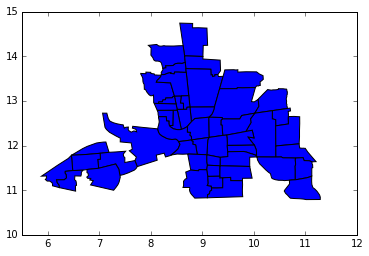

In [8]:
reg_fig = plt.figure()
reg_ax = reg_fig.add_subplot(111) 
for a in A.Atoms.values():
    reg_ax.add_patch(d.PolygonPatch(a.polygon))

reg_ax.axis([5.5,12,10,15])
reg_fig.show()

In [9]:
reg_fig = plt.figure()
reg_ax = reg_fig.add_subplot(111) 
for r in A.Regions:
    r.build_polygon()
    reg_ax.add_patch(d.(r.polygon))

reg_ax.axis([5.5,12,10,15])
reg_fig.show()

SyntaxError: invalid syntax (<ipython-input-9-3d6878b258a3>, line 5)